In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [7]:
df=pd.read_csv('Crop_recommendation.csv')

In [8]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1760
Rows in test set: 440



In [11]:
train_set.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango


In [12]:
test_set.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple


array([[<AxesSubplot: title={'center': 'N'}>,
        <AxesSubplot: title={'center': 'P'}>,
        <AxesSubplot: title={'center': 'K'}>],
       [<AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'ph'}>],
       [<AxesSubplot: title={'center': 'rainfall'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

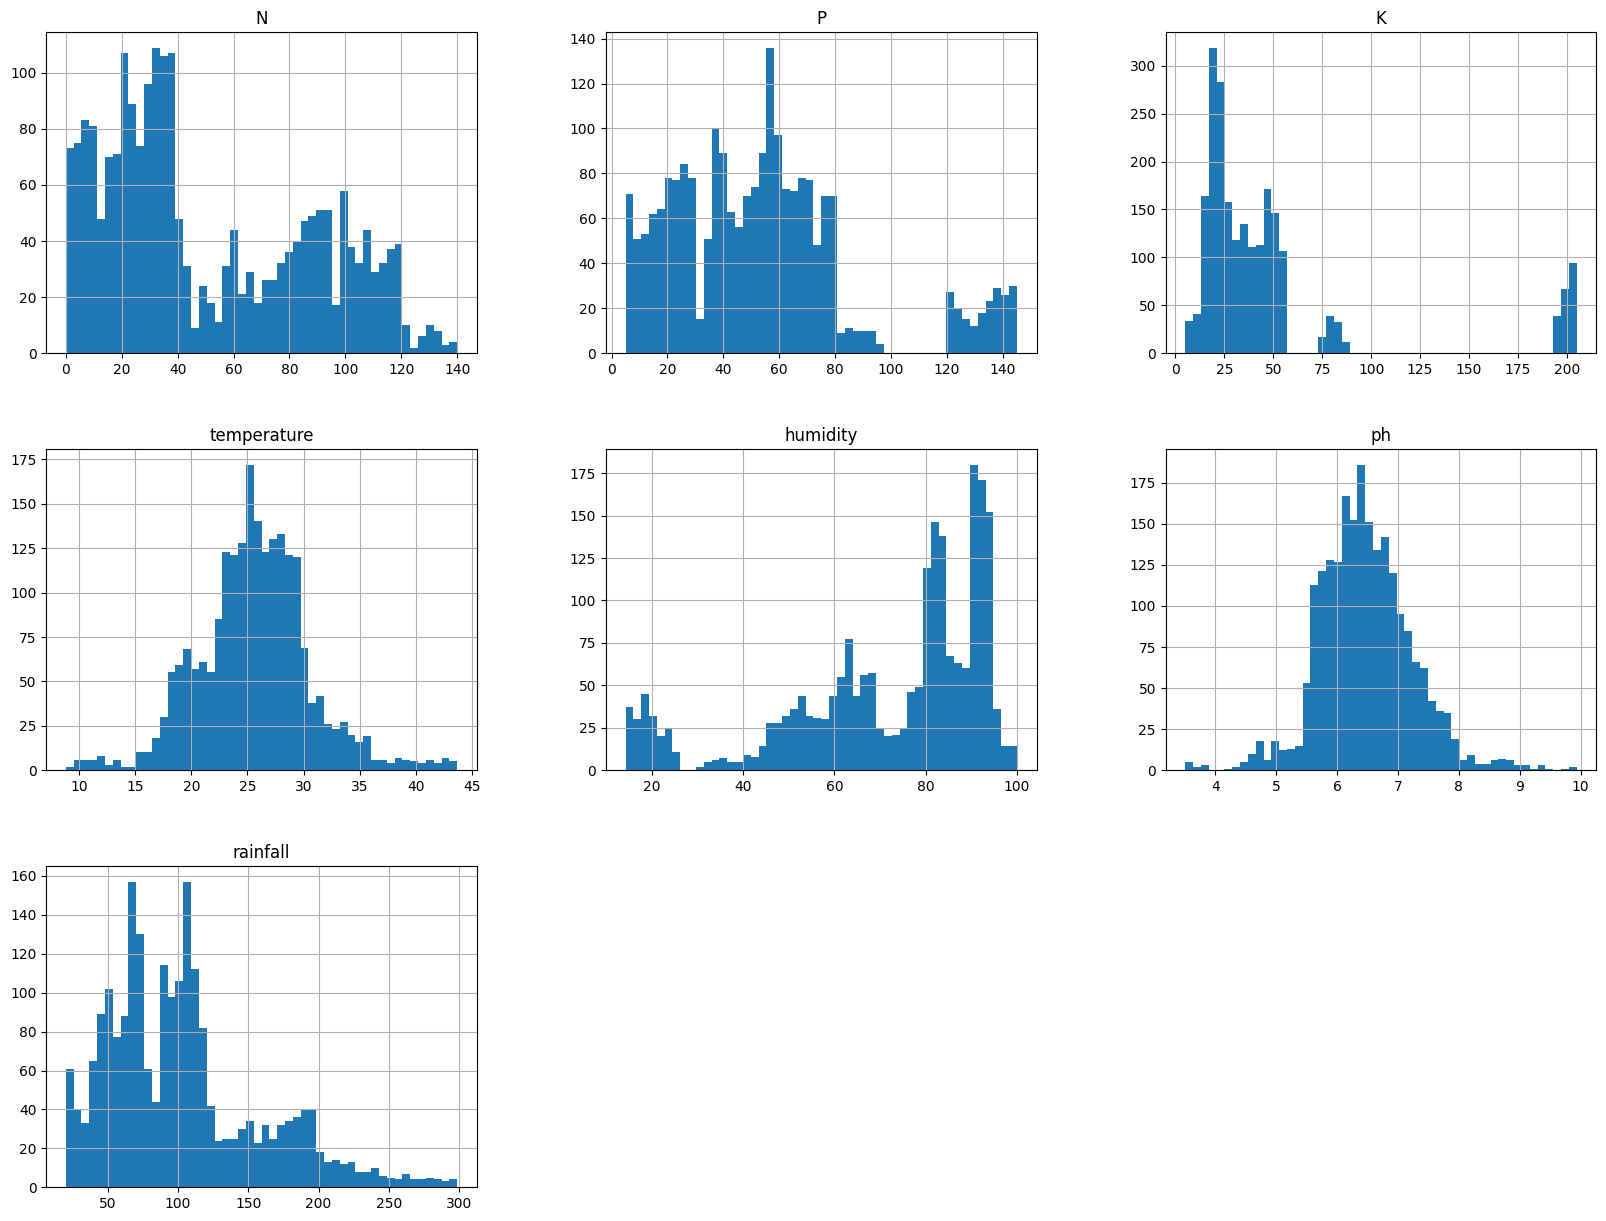

In [13]:
df.hist(bins=50,figsize=(20,15))

In [14]:
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [17]:
my_pipeline=Pipeline([
#     ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [18]:
train_set_label=train_set["label"].copy()
train_set.drop('label', inplace=True, axis=1)

In [19]:
train_set.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [20]:
train_set_label.head()

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
Name: label, dtype: object

In [21]:
test_set_label=test_set["label"].copy()
test_set.drop('label', inplace=True, axis=1)

In [22]:
train_set=my_pipeline.fit_transform(train_set)

In [23]:
train_set

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [24]:
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression

In [25]:
model=svc()
mod=LogisticRegression()

In [26]:
model.fit(train_set,train_set_label)

SVC()

In [27]:
mod.fit(train_set,train_set_label)

LogisticRegression()

In [28]:
test_set=my_pipeline.fit_transform(test_set)

In [29]:
model.score(test_set,test_set_label)

0.9590909090909091

In [30]:
mod.score(test_set,test_set_label)

0.9545454545454546

In [31]:
test_set[2]

array([0.25421252, 0.27579609, 0.01636317, 3.55194693, 0.95636671,
       0.64209145, 0.14771821])

In [32]:
model.predict(([[0.25421252, 0.27579609, 0.01636317, 3.55194693, 0.95636671,
       0.64209145, 0.14771821]]))

array(['papaya'], dtype=object)

In [33]:
from joblib import dump,load

In [34]:
dump(model,"Crop.joblib")

['Crop.joblib']